# Исследование надежности заемщиков

# Описание проекта

Заказчик — кредитный отдел банка. Необходимо выяснить, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Результаты исследования будут учтены при построении модели кредитного скоринга.

Входные данные от банка — статистика о платёжеспособности клиентов.

# Описание данных

- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-пропусков" data-toc-modified-id="Удаление-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление пропусков</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li><li><span><a href="#Удаление-пропусков-(продолжение)" data-toc-modified-id="Удаление-пропусков-(продолжение)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление пропусков (продолжение)</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Исследование-данных-и-рассмотрение-вопросов." data-toc-modified-id="Исследование-данных-и-рассмотрение-вопросов.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование данных и рассмотрение вопросов.</a></span><ul class="toc-item"><li><span><a href="#Есть-ли-зависимость-между-количеством-детей-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-количеством-детей-и-возвратом-кредита-в-срок?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Есть ли зависимость между количеством детей и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Есть ли зависимость между семейным положением и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Есть ли зависимость между уровнем дохода и возвратом кредита в срок?</a></span></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Как разные цели кредита влияют на его возврат в срок?</a></span></li><li><span><a href="#Возможные-причины-появления-пропусков-в-исходных-данных:" data-toc-modified-id="Возможные-причины-появления-пропусков-в-исходных-данных:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Возможные причины появления пропусков в исходных данных:</a></span></li><li><span><a href="#Объяснение-заполнения-пропусков-медианным-значением:" data-toc-modified-id="Объяснение-заполнения-пропусков-медианным-значением:-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Объяснение заполнения пропусков медианным значением:</a></span></li></ul></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></div>

## Изучение данных

**Импортируем библиотеку pandas и считаем данные из csv-файла в датафрейм:**


In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Выведем первые 20 строчек:**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Посмотрим основную информацию о датафрейме с помощью метода `info()`:**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Рассмотрим количество пропущенных значений для каждого столбца:**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Столбец с пропущенными значениями — `total_income` — хранит данные о доходах.**

**Т.к на сумму дохода сильнее всего влияет тип занятости, поэтому заполнять пропуски в этом столбце будем медианным значением по каждому типу из столбца `income_type`.  Пропуски в столбце `days_employed` обработаем на следующем этапе.**

In [32]:
for d in data['income_type'].unique():
    data.loc[(data['income_type'] == d) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == d), 'total_income'].median()

### Обработка аномальных значений

**В данных встречаются артефакты — отрицательное количество дней трудового стажа в столбце `days_employed`. 
Заменим все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях:**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) видны аномально большие значения. Т.к этот столбец не понадобится нам для исследования, оставим их как есть.

**Выведем перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие артефакты:**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Произведем проверку после удаления:**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Заполним пропуски в столбце `days_employed` медианными значениями каждого типа занятости `income_type`:**

In [11]:
for d in data['income_type'].unique():
    data.loc[(data['income_type'] == d) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == d), 'days_employed'].median()

**Сделаем проверку:**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`:**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Обработаем неявные дубликаты, т.к в столбце `education` есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру:**

In [14]:
data['education'] = data['education'].str.lower()

**Проверим количество строк-дубликатов, если такие останутся, то удалим их:**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**На основании диапазонов, указанных ниже, создадим столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Напишем собственную функцию с именем `categorize_income()`:**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Выведем перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследование данных и рассмотрение вопросов.

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

**Создадим сводную таблицу и поместим ее в переменную `depend_debt_children` при помощи метода `pivot_table()`**
- *Аргументы метода:*
- `index` - столбец, по которым группируем данные
- `values` - значения таблицы
- `aggfunc` - функции, применяемые к значениям

*К `aggfunc` ,в виде аргументов, будем применять следующие методы:*
- `count` : для подсчета всех выданных кредитов
- `sum` : для подсчета всех должников
- `mean` : для подсчета доли должников  ко всем выданным кредитам

In [22]:
depend_debt_children = data.pivot_table(index=['children'], values='debt', aggfunc=['count', 'sum', 'mean'])
depend_debt_children

,count,sum,mean
,debt,debt,debt
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


**Переименуем получившиеся столбцы в более понятные названия при помощи метода `columns`:**

In [23]:
depend_debt_children.columns = ['Всего выдано кредитов', 'Всего должников', 'Доля должников']
depend_debt_children

,Всего выдано кредитов,Всего должников,Доля должников
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


**Построим наглядную визуализацию зависимости доли должников от количества детей** 

*Выведем данные при помощи библиотеки `seaborn` и метода `barplot()`:*

<AxesSubplot:xlabel='children', ylabel='debt'>

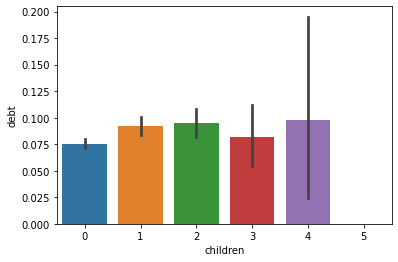

In [24]:
import seaborn as sn
sn.barplot(x=data['children'], y=data['debt'])

**Вывод:** 

- Исходя из полученных результатов глобально можно сказать, что должников, не имеющих детей, меньше, чем у тех, у кого они есть.

- Правда, есть исключение : те, кто имеет `5-х` детей - склонны возвращать кредит в срок. (доля должников равна `0`)

- Также интересным результатом стало то, что доля должников, имеющих `3-х` детей, несколько меньше по сравнению с другими группами должников, имеющих `1-го` , `2-х` или `4-х` иждевенцев.

- Насколько последний вывод статистически заничим - пока сказать сложно, но в дальнейшем можно провести дополнительную оценку этого фактора.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

**По аналогии с предыдущим пунктом создадим сводную таблицу и поместим ее в переменную `depend_debt_family`.** 

**И сразу переименуем столбцы:**

In [25]:
depend_debt_family = data.pivot_table(index=['family_status'], values='debt', aggfunc=['count', 'sum', 'mean'])
depend_debt_family.columns = ['Всего выдано кредитов', 'Всего должников', 'Доля должников']
depend_debt_family

,Всего выдано кредитов,Всего должников,Доля должников
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


**Построим график зависимости семейного статуса к доле должников:**

<AxesSubplot:xlabel='debt', ylabel='family_status'>

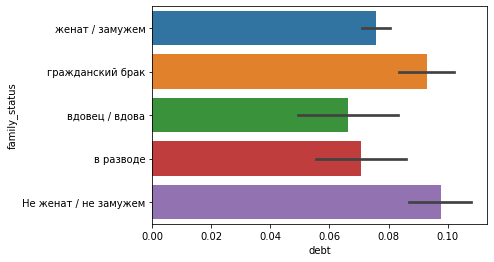

In [26]:
sn.barplot(x=data['debt'], y=data['family_status'])

**Вывод:** 
1. Доля должников среди людей с семейным статусом `'вдовец\вдова'`, `'в разводе'` меньше, чем у других подгрупп.

Также можно разделить все подгруппы на 2 категории: 

*1.Имеющие партнера:*
- `'вдовец\вдова'`
- `'в разводе'`
- `'не женат \ не замужем'`

*2.Без партнера:*
- `'женат \ замужем'`
- `'гражданский брак'`

2. В `1-й` категории доля должников в подгруппе `'не женат \ не замужем'` гораздо больше, чем у двух других подгрупп.
3. Во `2-й` категории доля должников у тех, кто состоит в `'гражданском браке'` выше, чем у тех, кто `'женат \ замужем'`


### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**Как и ренее создадим сводную таблицу и поместим ее в переменную `depend_debt_income`.** 

**Также сразу переименуем столбц:**

In [27]:
depend_debt_income = data.pivot_table(index=['total_income_category'], values='debt', aggfunc=['count', 'sum', 'mean'])
depend_debt_income.columns = ['Всего выдано кредитов', 'Всего должников', 'Доля должников']
depend_debt_income

,Всего выдано кредитов,Всего должников,Доля должников
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


**Обозначение категорий в `total_income_category`:**

- 1000001 и выше — `'A'`;
- 200001–1000000 — `'B'`;
- 50001–200000 — `'C'`;
- 30001–50000 — `'D'`;
- 0–30000 — `'E'`.




**Снова визуализируем данные через `barplot`. График доли должников по категориям уровня дохода:**

<AxesSubplot:xlabel='debt', ylabel='total_income_category'>

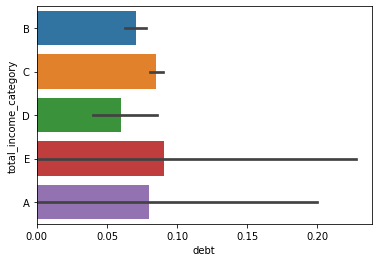

In [28]:
sn.barplot(x=data['debt'], y=data['total_income_category'])

**Вывод:** 
1. Т.к. выборка данных по группам `А`, `D`, `E` не репрезентативна, то сделать корректный вывод по ним нельзя, поэтому пока что не берем их в расчет.

2. На основе категорий `В` и `С` можно сказать, что чем выше доход, тем выше вероятность, что клиент выплатит в срок. 


### Как разные цели кредита влияют на его возврат в срок?

**Создаем сводную таблицу и помещаем ее в переменную `depend_debt_purpose`.** 

**Переименуем столбцы, как и раньше.**

In [29]:
depend_debt_purpose = data.pivot_table(index=['purpose_category'], values='debt', aggfunc=['count', 'sum', 'mean'])
depend_debt_purpose.columns = ['Всего выдано кредитов', 'Всего должников', 'Доля должников']
depend_debt_purpose

,Всего выдано кредитов,Всего должников,Доля должников
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


**Как и прежде визуализируем данные. График соотношения доли должников к цели кредита:**

<AxesSubplot:xlabel='debt', ylabel='purpose_category'>

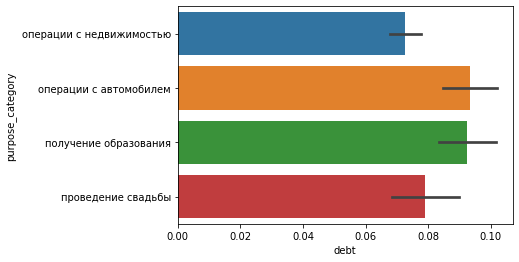

In [30]:
sn.barplot(x=data['debt'], y=data['purpose_category'])

**Вывод:** 
1. Больше всего должников среди тех, кто взял кредит на `операции с автомобилем`. Кредит на `получение образования` идет следом с небольшим отставанием.
2. Меньше всего должников среди `операций с недвижимостью`.

### Возможные причины появления пропусков в исходных данных:

Пропуски у нас встречаются в двух столбцах:
1. `days_employed`
2. `total_income`

Относительно `1-го` пункта - тип пропуска может быть, как случайным (например зависеть от категории `студент`), так и неслучайным вовсе, но от чего это зависит - предположений нет.

Касаемо `2-го` пункта предположение в том, что люди просто не указывали свой ежемесячный доход, возможно, желая его скрыть.
Возможно, пропуск в `total_income` зависит от типа занятости `income_type`. Если человек фактически не имеет дохода, что вероятно для `пенсионеров`, `безработных`, `студентов` и женщин `в декрете`, то они могли просто пропустить ввод данных и из- за этого образовался пропуск. Соответственно, тип пропуска - случайный.

### Объяснение заполнения пропусков медианным значением:

Так как в нашей выборке данных присутствует сильный разброс значений, некоторые явно выделяются среди большинства, то нахождение медианы для пропусков - лучшее решение для количественных переменных. 

Среднее арифметическое значение, например, некорректно охарактеризует данные, что отразится на результате в отрицательную сторону.

## Общий вывод.

**Мы рассмотрели четыре вопроса:**

**1. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

*Выявили:*
- В срок чаще выплачивают кредит те клиенты, у которых нет детей.

**2. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

*Установили:*
- Доля должников среди людей с семейным статусом 'вдовец\вдова', 'в разводе' меньше, чем у других подгрупп.
- В целом, можно сказать о том, что клиенты, побывавшие в браке, реже допускают просрочки по кредитам.

**3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

*Определили:*
- На основе категорий `В` и `С` можно сказать, что чем выше доход, тем выше вероятность, что клиент выплатит в срок.`

**4. Как разные цели кредита влияют на его возврат в срок?**

*Обнаружили:*
- Больше всего должников среди тех, кто взял кредит на операции с автомобилем.
Кредит на получение образования идет следом с небольшим отставанием.
- Меньше всего должников среди операций с недвижимостью.

**Общие рекомендации:**

Для большей репрезентативности данных в отдельных группах рекомендуется увеличить количество наблюдений.

Так, например, при рассмотрении `1-го` вопроса нельзя сделать корректный вывод о наличии зависимости по клиентам, у которых `3`, `4`, `5` детей 
Та же рекомендация применима и к клиентам, имеющим доход по группам `A`, `D`, `E` в `3-м` вопросе.